<a href="https://colab.research.google.com/github/miklaszewskigrzegorz/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%reload_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure


from sklearn.metrics import accuracy_score


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_tree/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_tree/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test  = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test , y_test  = test ['features'], test ['labels']

In [4]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [5]:
len(np.unique(y_train)) #check how many unique (on y_train) 
                        #output = 43
                        # it means that we need to 43 column for fetures in binary code 1/0
                        # is this feature in column = 1 
                        # and 42 column give valie  = 0

43

In [6]:
np.unique(y_train) # because array start at 0 and finish at 42.
                   # means (0-42) -- array with unique 43 value
                   # the highets is 42

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [59]:

model = Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(num_classes, activation='softmax'),       
      ])
#model.summary()


model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 9.3333 - accuracy: 0.7726


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(num_classes, activation='softmax'),       
      ])


def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

 

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callbacks]
      )
  
  return model
  # yesterday >> in day3 >> OUTPUT is 'logdir'
  # now       >> in day4 >> OUTPUT is 'model'

In [49]:
train_model(model, X_train, y_train, )

<function __main__.train_model>

In [41]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train) #'change on model_trained from logdir'


Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 18.6428 - accuracy: 0.7423 - val_loss: 0.2438 - val_accuracy: 0.9389
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2362 - accuracy: 0.9464 - val_loss: 0.1610 - val_accuracy: 0.9618
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1343 - accuracy: 0.9678 - val_loss: 0.1125 - val_accuracy: 0.9735
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1478 - accuracy: 0.9667 - val_loss: 0.1171 - val_accuracy: 0.9701
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0929 - accuracy: 0.9787 - val_loss: 0.0527 - val_accuracy: 0.9870


In [42]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[2.40682162e-11, 3.81993414e-06, 6.08619209e-03, ...,
        1.12182926e-03, 2.72770303e-05, 1.14521231e-06],
       [9.97735228e-12, 7.71311170e-05, 1.12535834e-01, ...,
        2.76859617e-04, 6.07152284e-09, 6.95328879e-08],
       [8.84150753e-10, 1.68835013e-05, 3.24308081e-03, ...,
        1.12599728e-03, 8.39891727e-05, 2.35427001e-06],
       ...,
       [1.98321533e-03, 4.39409679e-03, 1.20458696e-02, ...,
        9.51356255e-03, 1.17301084e-02, 1.73750368e-03],
       [1.01961114e-03, 8.62216949e-03, 3.00132893e-02, ...,
        2.40203235e-02, 9.39990953e-03, 1.15035230e-03],
       [5.35963743e-04, 4.73309215e-03, 1.02678789e-02, ...,
        6.78530661e-03, 7.06104888e-03, 2.50141881e-03]], dtype=float32)

In [13]:
y_pred_prob[400] #prawdopodobieństwo do każdej klasy

array([3.5532516e-06, 8.3527017e-01, 1.1300701e-05, 5.7367309e-11,
       1.6471076e-01, 4.3130121e-06, 7.2361862e-14, 2.9410221e-14,
       9.1340054e-18, 1.5345392e-12, 2.1598141e-14, 8.4587759e-15,
       1.7058524e-16, 8.1799891e-18, 5.0913906e-25, 8.2962233e-09,
       1.2903855e-21, 7.6900543e-24, 5.6317942e-15, 5.1245919e-33,
       7.0834321e-18, 2.3195114e-11, 4.5502481e-32, 1.6037741e-21,
       5.7652233e-20, 5.5157347e-20, 2.0392078e-14, 3.6467492e-20,
       1.2930279e-19, 4.4323435e-18, 9.6064852e-18, 1.2005972e-16,
       2.6137636e-18, 9.7576927e-25, 3.6446900e-28, 5.3827233e-28,
       1.5480811e-29, 0.0000000e+00, 4.0188804e-29, 0.0000000e+00,
       2.7379648e-28, 4.1096113e-26, 3.0318796e-11], dtype=float32)

In [14]:
# sprawdzenie (jak zsumujesz wszystkie prawdopodobieństwa dostajesz 1 czyli 100 ale któreś
# prawdopodobieństwo wygrywa można to zobaczyć)
np.sum( [3.75506177e-04, 4.82066564e-04, 6.36566924e-08, 3.26784232e-07,
       9.99142051e-01, 5.98595562e-10, 1.80969004e-10, 1.36401036e-14,
       1.71345880e-21, 2.57636208e-12, 8.12250725e-15, 1.20095878e-16,
       1.04866330e-14, 3.93914472e-16, 2.94079484e-19, 8.60857968e-23,
       7.20812079e-15, 2.19962054e-29, 2.71608288e-16, 3.65083716e-22,
       1.15114285e-14, 2.04425727e-15, 9.24650733e-32, 2.73048002e-17,
       1.10224258e-16, 5.23349259e-15, 7.62699428e-20, 6.65868015e-27,
       1.89356367e-14, 9.28463605e-19, 2.59970579e-23, 1.22349938e-12,
       3.01188399e-15, 9.70021632e-11, 1.31402934e-22, 9.57124691e-09,
       2.46361576e-23, 1.63593945e-24, 4.87318277e-16, 1.00535564e-21,
       5.42656323e-17, 9.24498660e-18, 4.08617917e-18])

1.0000000246336196

<BarContainer object of 43 artists>

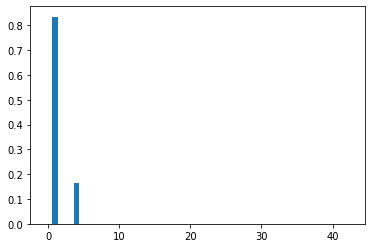

In [15]:
plt.bar(range(43), y_pred_prob[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
#df.to_dict()['b']  # klucze jako id a wartość jako labels
labels_dict = df.to_dict()['b']

In [17]:
labels_dict [ np.argmax(y_pred_prob[400]) ] #zwraca index gdzie jest maxymalna warość

'Speed limit (30km/h)'

In [0]:
# pomyłka przewidział 7km a jest 30km/h

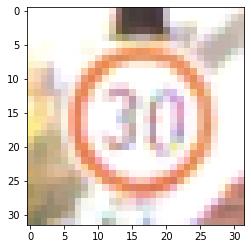

In [18]:
plt.imshow(X_test[400])
# this sign i

In [19]:
ls data

signnames.csv  test.p  train.p


In [20]:
labels_dict [1] ## to już zgadnięte 30 to 30 

'Speed limit (30km/h)'

In [0]:
# ok teraz prognozujemy 

In [50]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

ERROR! Session/line number was not unique in database. History logging moved to new session 63


In [51]:
predict(model_trained, X_test, y_test)

0.8331065759637188

In [0]:
## ok 83 to średni wynik - treaz spróbujemy podkręcić

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

Using TensorFlow backend.


In [75]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        MaxPool2D(),
        Dropout(0.3),  
    
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),  

        Flatten(),

        Dense(1024, activation='relu'),  
        Dropout(0.3),    

        Dense(num_classes, activation='softmax'),  
                
      ])

train_and_predict( get_cnn_v2(input_shape, num_classes) )



Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 4.4209 - accuracy: 0.4088 - val_loss: 0.5817 - val_accuracy: 0.8648
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.6618 - accuracy: 0.8080 - val_loss: 0.1767 - val_accuracy: 0.9639
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3791 - accuracy: 0.8878 - val_loss: 0.0994 - val_accuracy: 0.9804
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2725 - accuracy: 0.9204 - val_loss: 0.0664 - val_accuracy: 0.9866
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2084 - accuracy: 0.9388 - val_loss: 0.0371 - val_accuracy: 0.9931


0.9408163265306122

In [0]:
#ok 3 model (po 2 warstwy takie same konwolucyjne obok siebie )

In [77]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),  
    
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # 2 warstwy konwolucyjne obok siebie
        MaxPool2D(),
        Dropout(0.3),  

        Flatten(),

        Dense(1024, activation='relu'),  
        Dropout(0.3),    

        Dense(num_classes, activation='softmax'),  
                
      ])

train_and_predict( get_cnn_v3(input_shape, num_classes) )


Epoch 1/5
272/272 [==============================] - 6s 21ms/step - loss: 1.8781 - accuracy: 0.5992 - val_loss: 0.1943 - val_accuracy: 0.9588
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.3792 - accuracy: 0.8905 - val_loss: 0.0890 - val_accuracy: 0.9805
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2277 - accuracy: 0.9330 - val_loss: 0.0368 - val_accuracy: 0.9911
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1538 - accuracy: 0.9542 - val_loss: 0.0259 - val_accuracy: 0.9949
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1196 - accuracy: 0.9638 - val_loss: 0.0193 - val_accuracy: 0.9959


0.9757369614512472

In [0]:
#model 4 więcej warstw

In [81]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),  
    
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # 2 warstwy konwolucyjne obok siebie
        MaxPool2D(),
        Dropout(0.3),  

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # 2 warstwy konwolucyjne obok siebie
        MaxPool2D(),
        Dropout(0.3),  

        Flatten(),

        Dense(1024, activation='relu'),  
        Dropout(0.3),    

        Dense(num_classes, activation='softmax'),  
                
      ])

#train_and_predict( get_cnn_v4(input_shape, num_classes) )
get_cnn_v4(input_shape, num_classes).summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)        

In [82]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),  
    
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # 2 warstwy konwolucyjne obok siebie
        MaxPool2D(),
        Dropout(0.3),  

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # 2 warstwy konwolucyjne obok siebie
        MaxPool2D(),
        Dropout(0.3),  

        Flatten(),

        Dense(1024, activation='relu'),  
        Dropout(0.3),    

        Dense(num_classes, activation='softmax'),  
                
      ])

train_and_predict( get_cnn_v4(input_shape, num_classes) )
#get_cnn_v4(input_shape, num_classes).summary()

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.6673 - accuracy: 0.2583 - val_loss: 1.2019 - val_accuracy: 0.6607
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 1.0925 - accuracy: 0.6554 - val_loss: 0.4336 - val_accuracy: 0.8739
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5724 - accuracy: 0.8192 - val_loss: 0.2129 - val_accuracy: 0.9383
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.3805 - accuracy: 0.8808 - val_loss: 0.1166 - val_accuracy: 0.9657
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2913 - accuracy: 0.9105 - val_loss: 0.0901 - val_accuracy: 0.9721


0.9308390022675737

In [83]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),  
    
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # 2 warstwy konwolucyjne obok siebie
        MaxPool2D(),
        Dropout(0.3),  

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # 2 warstwy konwolucyjne obok siebie
        MaxPool2D(),
        Dropout(0.3),  

        Flatten(),

        Dense(1024, activation='relu'),  
        Dropout(0.3), 

        Dense(1024, activation='relu'),  
        Dropout(0.3),   

        Dense(num_classes, activation='softmax'),  
                
      ])

train_and_predict( get_cnn_v5(input_shape, num_classes) )
#get_cnn_v4(input_shape, num_classes).summary()

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 2.8213 - accuracy: 0.2515 - val_loss: 1.1401 - val_accuracy: 0.6499
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 1.0195 - accuracy: 0.6792 - val_loss: 0.2645 - val_accuracy: 0.9286
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.4687 - accuracy: 0.8555 - val_loss: 0.1477 - val_accuracy: 0.9583
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2845 - accuracy: 0.9154 - val_loss: 0.0478 - val_accuracy: 0.9869
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1970 - accuracy: 0.9438 - val_loss: 0.0403 - val_accuracy: 0.9889


0.9757369614512472

In [84]:
X_train[0].shape

(32, 32, 3)

In [0]:
## warto 32,32,3 (3 kanały skonwertować do 1 do skali szarości)

In [87]:
color.rgb2gray( X_train[0]).shape

(32, 32)

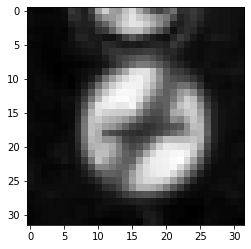

In [88]:
plt.imshow(color.rgb2gray( X_train[0]), cmap=plt.get_cmap('gray') )

In [89]:
# teraz na wszystkich zdjęciach 
color.rgb2gray( X_train).shape

(34799, 32, 32)

In [0]:
# ważne reshape żeby udało się wgrać szare do inputa
X_train_gray.reshape(-1,32,32,1).shape
# - 1 oznacza że biblioteka liczy ten parametr autpomatycznie

In [0]:
X_train_gray = color.rgb2gray( X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray( X_test).reshape(-1,32,32,1)

In [96]:
#czyli uczymy sie na szarych zdjęciach i prognozujemy szare zdjęcia
# input.shape był 32,32,3 a teraz trzeba wkleić 32,32,1

model  = get_cnn_v5([32,32,1], num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 2.6135 - accuracy: 0.2596 - val_loss: 0.8325 - val_accuracy: 0.7304
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.5472 - accuracy: 0.8223 - val_loss: 0.1184 - val_accuracy: 0.9674
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2315 - accuracy: 0.9254 - val_loss: 0.0705 - val_accuracy: 0.9765
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1479 - accuracy: 0.9523 - val_loss: 0.0268 - val_accuracy: 0.9935
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1100 - accuracy: 0.9660 - val_loss: 0.0188 - val_accuracy: 0.9945


0.9712018140589569

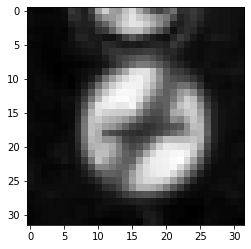

In [98]:
plt.imshow(color.rgb2gray( X_train[0]), cmap=plt.get_cmap('gray') )

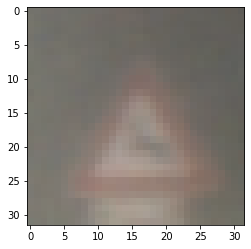

In [100]:
plt.imshow( X_train[400])

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[: , : ,2])
  img = color.hsv2rgb(hsv)

  return img

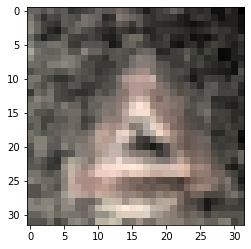

In [106]:
plt.imshow( preproc_img(X_train[400]) )

In [107]:
# kod wolny żeby poprawić wynik 
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

for i in tqdm(range(X_train.shape[0])):
  X_train_prpp[i] = preproc_img(X_train[i])

NameError: ignored